In [237]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

file1 = pd.read_csv('data/resto/chefmozaccepts.csv')
file2 = pd.read_csv('data/resto/chefmozcuisine.csv')
file3 = pd.read_csv('data/resto/chefmozhours4.csv')
file4 = pd.read_csv('data/resto/chefmozparking.csv')
file5 = pd.read_csv('data/resto/geoplaces2.csv')
file6 = pd.read_csv('data/resto/rating_final.csv')
file7 = pd.read_csv('data/resto/usercuisine.csv')
file8 = pd.read_csv('data/resto/userpayment.csv')
file9 = pd.read_csv('data/resto/userprofile.csv')

# ¿Qué tenemos en file1? 

In [238]:
print "Cantidad? No vaya a ser que haga una muestra de tooodos los datos"
print len(file1)
print "Un par de datos:"
print file1.tail()
print "Algunas estadísticas:"
print file1.describe()
print "Qué datos?:"
print file1.columns
print "Más info:"
print file1.info()

Cantidad? No vaya a ser que haga una muestra de tooodos los datos
1314
Un par de datos:
      placeID             Rpayment
1309   132012          Diners_Club
1310   132002  MasterCard-Eurocard
1311   132002                 Visa
1312   132002     American_Express
1313   132002          Diners_Club
Algunas estadísticas:
             placeID
count    1314.000000
mean   133218.739726
std      1058.270738
min    132002.000000
25%    132580.250000
50%    132788.500000
75%    133035.750000
max    135110.000000
Qué datos?:
Index([u'placeID', u'Rpayment'], dtype='object')
Más info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 15.4+ KB
None


## Formas de pago más comunes
#### ¿Son formas de pago? Tenemos las distintas formas de pago dadas en sucursales

In [239]:
payment = file1['Rpayment']
payment.drop_duplicates(keep='first', inplace=True)
print len(payment)
print payment

12
0                      cash
1                      VISA
2       MasterCard-Eurocard
3          American_Express
4          bank_debit_cards
298                  checks
302                Discover
401           Carte_Blanche
963             Diners_Club
1004                   Visa
1009    Japan_Credit_Bureau
1027      gift_certificates
Name: Rpayment, dtype: object


In [240]:
payment = file1[['Rpayment', 'placeID']]
#Para solucionar VISA -> Visa
payment['Rpayment'] = map(lambda x: x.upper(), payment['Rpayment'])
payment = payment.groupby(['Rpayment']).count().sort_values(by='placeID',ascending = False)
print payment

                     placeID
Rpayment                    
CASH                     500
VISA                     255
MASTERCARD-EUROCARD      194
AMERICAN_EXPRESS         153
BANK_DEBIT_CARDS         130
DINERS_CLUB               42
DISCOVER                  11
CHECKS                    10
CARTE_BLANCHE              7
GIFT_CERTIFICATES          7
JAPAN_CREDIT_BUREAU        5


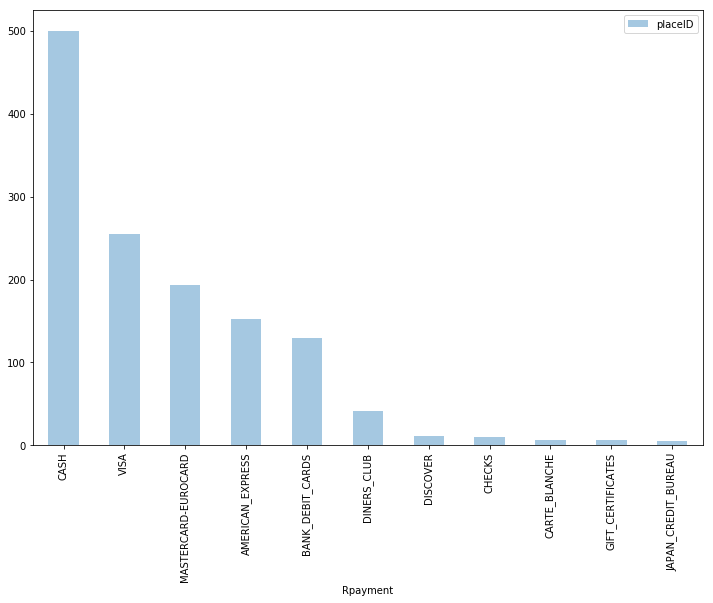

In [241]:
payment.plot(kind = 'bar', alpha=0.40, figsize=(12,8), sort_columns = True)

## ¿Cuántas fragancias tiene esta línea de restaurantes? 

In [242]:
fragancias = file1['placeID']
fragancias.drop_duplicates(keep='first', inplace=True)
print len(fragancias)

615


# ¿Qué tenemos en file2? 

In [243]:
print "Cantidad? No vaya a ser que haga una muestra de tooodos los datos"
print len(file2)
print "Un par de datos:"
print file2.tail().sort_values(by= 'placeID',ascending = True)
print "Algunas estadísticas:"
print file2.describe()
print "Qué datos?:"
print file2.columns
print "Más info:"
print file2.info()

Cantidad? No vaya a ser que haga una muestra de tooodos los datos
916
Un par de datos:
     placeID       Rcuisine
915   132001  Dutch-Belgian
914   132002        Seafood
913   132003  International
912   132004        Seafood
911   132005        Seafood
Algunas estadísticas:
             placeID
count     916.000000
mean   132897.174672
std       923.601711
min    132001.000000
25%    132323.250000
50%    132630.500000
75%    132907.250000
max    135110.000000
Qué datos?:
Index([u'placeID', u'Rcuisine'], dtype='object')
Más info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
placeID     916 non-null int64
Rcuisine    916 non-null object
dtypes: int64(1), object(1)
memory usage: 10.8+ KB
None


## ¿Qué vende?

In [244]:
fragancias = file2['placeID']
fragancias.drop_duplicates(keep='first', inplace=True)
print "Cantidad de fragancias:"
print len(fragancias)

platos = file2['Rcuisine']
platos.drop_duplicates(keep='first', inplace=True)
print "Variedad"
print len(platos)
print platos

Cantidad de fragancias:
769
Variedad
59
0                   Spanish
1                   Italian
2            Latin_American
3                   Mexican
4                 Fast_Food
6                   Burgers
7         Dessert-Ice_Cream
9                  Hot_Dogs
12                   Steaks
17                    Asian
19            International
20                Mongolian
22               Vegetarian
23                Brazilian
27         Cafe-Coffee_Shop
28                Cafeteria
29             Contemporary
30          Deli-Sandwiches
31                    Diner
37                 Japanese
38                    Sushi
40                  Seafood
45                  Chinese
48                      Bar
49          Bar_Pub_Brewery
57                 Pizzeria
115           Mediterranean
134                American
136                  Family
140               Caribbean
183                 African
185        Breakfast-Brunch
234                Regional
246                  Afghan
259     

In [245]:
platos = file2[['Rcuisine', 'placeID']]
platos['Rcuisine'] = map(lambda x: x.upper(), platos['Rcuisine'])
platos = platos.groupby(['Rcuisine']).count().sort_values(by='placeID',ascending = False)
print platos

                      placeID
Rcuisine                     
MEXICAN                   239
INTERNATIONAL              62
AMERICAN                   59
DUTCH-BELGIAN              55
ITALIAN                    42
GREEK                      33
BAR                        32
FRENCH                     31
CAFE-COFFEE_SHOP           27
PIZZERIA                   25
BAR_PUB_BREWERY            24
CAFETERIA                  23
CHINESE                    21
FAST_FOOD                  20
SEAFOOD                    18
JAPANESE                   17
FAMILY                     14
GERMAN                     14
MEDITERRANEAN              13
BURGERS                    13
VEGETARIAN                 10
DELI-SANDWICHES             9
CONTEMPORARY                9
STEAKS                      8
LATIN_AMERICAN              7
ASIAN                       7
HOT_DOGS                    7
SUSHI                       6
JUICE                       6
BAKERY                      6
ARMENIAN                    5
POLISH    

## ¿Será mexicano el restaurante?

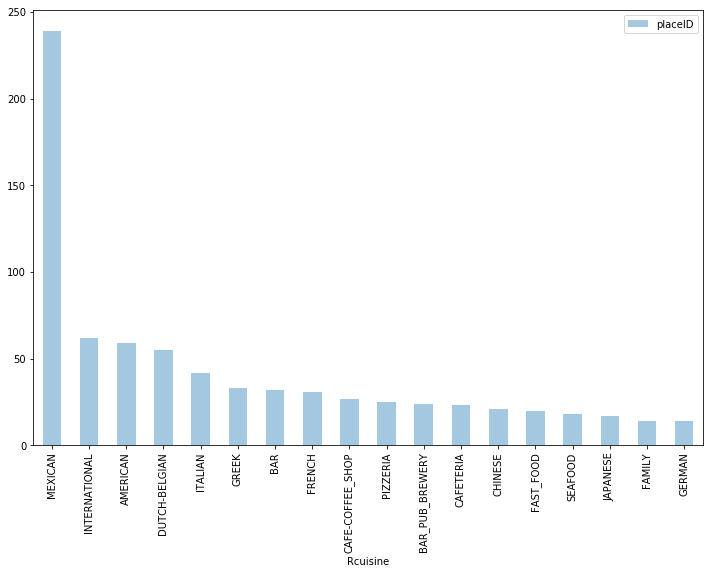

In [246]:
platos[0:18].plot(kind = 'bar', alpha=0.40, figsize=(12,8), sort_columns = True)

# ¿Qué tenemos en file3? 

In [247]:
print "Cantidad? No vaya a ser que haga una muestra de tooodos los datos"
print len(file3)
file3.drop_duplicates(keep='first', inplace=True)
print "Un par de datos:"
print file3.tail()
print "Algunas estadísticas:"
print file3.describe()
print "Qué datos?:"
print file3.columns
print "Más info:"
print file3.info()

Cantidad? No vaya a ser que haga una muestra de tooodos los datos
2339
Un par de datos:
      placeID         hours                  days
2329   132023  11:00-00:00;                  Sun;
2331   132023  11:00-00:00;  Mon;Tue;Wed;Thu;Fri;
2333   132012  12:00-22:00;                  Sun;
2335   132012  12:00-22:00;  Mon;Tue;Wed;Thu;Fri;
2337   132012  12:00-22:00;                  Sat;
Algunas estadísticas:
             placeID
count    2068.000000
mean   133184.307544
std       947.655983
min    132012.000000
25%    132654.750000
50%    132832.000000
75%    133011.000000
max    135111.000000
Qué datos?:
Index([u'placeID', u'hours', u'days'], dtype='object')
Más info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2337
Data columns (total 3 columns):
placeID    2068 non-null int64
hours      2068 non-null object
days       2068 non-null object
dtypes: int64(1), object(2)
memory usage: 48.5+ KB
None


# Horarios en que abren sus puertas

In [248]:
schedule = file3[['days', 'hours', 'placeID']]
schedule.drop_duplicates(subset=['days', 'hours'],keep='first', inplace=True)
print schedule.tail()

                      days                     hours  placeID
2310                  Sun;              06:30-22:00;   132097
2313                  Sun;  12:00-15:00;15:00-21:00;   132030
2315  Mon;Tue;Wed;Thu;Fri;  12:00-15:00;15:00-21:00;   132030
2317                  Sat;  12:00-15:00;15:00-21:00;   132030
2319  Mon;Tue;Wed;Thu;Fri;              12:00-14:30;   132026


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# ¿Qué tenemos en file4? 

In [249]:
print "Cantidad? No vaya a ser que haga una muestra de tooodos los datos"
print len(file4)
print "Un par de datos:"
print file4.tail()
print "Algunas estadísticas:"
print file4.describe()
print "Qué datos?:"
print file4.columns
print "Más info:"
print file4.info()

Cantidad? No vaya a ser que haga una muestra de tooodos los datos
702
Un par de datos:
     placeID parking_lot
697   132024      street
698   132023         fee
699   132023      public
700   132012      public
701   132012      street
Algunas estadísticas:
             placeID
count     702.000000
mean   133180.945869
std       942.044238
min    132012.000000
25%    132649.250000
50%    132826.500000
75%    133008.750000
max    135111.000000
Qué datos?:
Index([u'placeID', u'parking_lot'], dtype='object')
Más info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
placeID        702 non-null int64
parking_lot    702 non-null object
dtypes: int64(1), object(1)
memory usage: 8.3+ KB
None


In [250]:
parking = file4['parking_lot']
parking.drop_duplicates(keep='first', inplace=True)
print len(parking)
print parking

7
0                 public
1                   none
7                    yes
8          valet parking
18                   fee
616               street
656    validated parking
Name: parking_lot, dtype: object


In [251]:
parking = file4[['parking_lot', 'placeID']]
parking['parking_lot'] = map(lambda x: 'No podés dejar el auto' if (x=='none') else ('Tenés donde dejarlo' if x == 'yes' else x), parking['parking_lot'])
parking = parking.groupby(['parking_lot']).count().sort_values(by='placeID',ascending = False)
print parking

                        placeID
parking_lot                    
No podés dejar el auto      348
Tenés donde dejarlo         174
public                      102
street                       32
fee                          22
valet parking                21
validated parking             3


## ¿Dónde dejo mi auto?

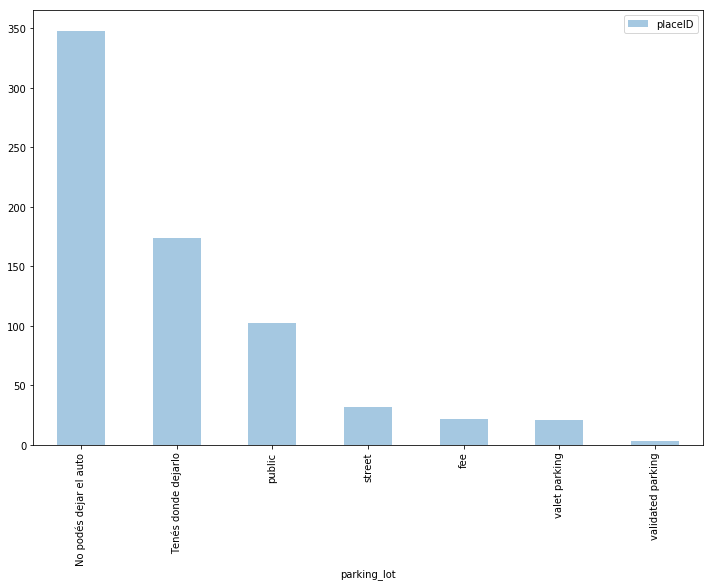

In [252]:
parking.plot(kind = 'bar', alpha=0.40, figsize=(12,8), sort_columns = True)

# ¿Qué tenemos en el file5?

In [253]:
print "Cantidad? No vaya a ser que haga una muestra de tooodos los datos"
print len(file5)
print "Un par de datos:"
print file5.tail()
print "Algunas estadísticas:"
print file5.describe()
print "Qué datos?:"
print file5.columns
print "Más info:"
print file5.info()

Cantidad? No vaya a ser que haga una muestra de tooodos los datos
130
Un par de datos:
     placeID   latitude   longitude  \
125   132866  22.141220 -100.931311   
126   135072  22.149192 -101.002936   
127   135109  18.921785  -99.235350   
128   135019  18.875011  -99.159422   
129   132877  22.135364 -100.934948   

                                        the_geom_meter  \
125  0101000020957F000013871838EC4A58C1B5DF74F8E396...   
126  0101000020957F0000E7B79B1DB94758C1D29BC363D8AA...   
127  0101000020957F0000A6BF695F136F5AC1DADF87B20556...   
128  0101000020957F0000B49B2E5C6E785AC12F9D58435241...   
129  0101000020957F000090735015B84B58C1AF0DC0414698...   

                            name  \
125                      Chaires   
126                   Sushi Itto   
127                    Paniroles   
128  Restaurant Bar Coty y Pablo   
129             sirloin stockade   

                                             address             city  \
125                                 Ric

In [263]:
joinfile = file1.set_index('placeID').join(file5.set_index('placeID'), how='left')
#limpiamos en donde falta la info.-
joinfile.dropna(inplace=True)
print joinfile.head()

                    Rpayment   latitude   longitude  \
placeID                                               
132560                  cash  23.752304  -99.166913   
132572                  cash  22.141647 -100.992712   
132583                  cash  18.922290  -99.234332   
132583                  VISA  18.922290  -99.234332   
132583   MasterCard-Eurocard  18.922290  -99.234332   

                                            the_geom_meter  \
placeID                                                      
132560   0101000020957F0000FC60BDA8E88157C1B2C357D6DA4E...   
132572   0101000020957F00005D19BF45294958C18FF7F8E260A8...   
132583   0101000020957F0000FBE7171F056F5AC1E8A6C0A5AF55...   
132583   0101000020957F0000FBE7171F056F5AC1E8A6C0A5AF55...   
132583   0101000020957F0000FBE7171F056F5AC1E8A6C0A5AF55...   

                       name                address             city  \
placeID                                                               
132560   puesto de gorditas  frente a

In [280]:
name_payment = joinfile[['name', 'Rpayment']]
print name_payment


                                       name             Rpayment
placeID                                                         
132560                   puesto de gorditas                 cash
132572                         Cafe Chaires                 cash
132583                     McDonalds Centro                 cash
132583                     McDonalds Centro                 VISA
132583                     McDonalds Centro  MasterCard-Eurocard
132583                     McDonalds Centro     bank_debit_cards
132584                   Gorditas Dona Tota                 cash
132594   tacos de barbacoa enfrente del Tec                 cash
132608               Hamburguesas La perica                 cash
132609             Pollo_Frito_Buenos_Aires                 cash
132613                        carnitas_mata                 cash
132626                la perica hamburguesa                 cash
132626                la perica hamburguesa     American_Express
132667       little pizza

### Otras cosas que se pueden hacer es buscar cuáles negocios permiten la venta de alcohol, las ubicaciones, el tipo de vestimenta aceptada, etc

# ¿Qué tenemos en file6?

In [281]:
print "Cantidad? No vaya a ser que haga una muestra de tooodos los datos"
print len(file6)
print "Un par de datos:"
print file6.tail()
print "Algunas estadísticas:"
print file6.describe()
print "Qué datos?:"
print file6.columns
print "Más info:"
print file6.info()

Cantidad? No vaya a ser que haga una muestra de tooodos los datos
1161
Un par de datos:
     userID  placeID  rating  food_rating  service_rating
1156  U1043   132630       1            1               1
1157  U1011   132715       1            1               0
1158  U1068   132733       1            1               0
1159  U1068   132594       1            1               1
1160  U1068   132660       0            0               0
Algunas estadísticas:
             placeID       rating  food_rating  service_rating
count    1161.000000  1161.000000  1161.000000     1161.000000
mean   134192.041344     1.199828     1.215332        1.090439
std      1100.916275     0.773282     0.792294        0.790844
min    132560.000000     0.000000     0.000000        0.000000
25%    132856.000000     1.000000     1.000000        0.000000
50%    135030.000000     1.000000     1.000000        1.000000
75%    135059.000000     2.000000     2.000000        2.000000
max    135109.000000     2.000000     

## ¿A dónde vamos a comer?

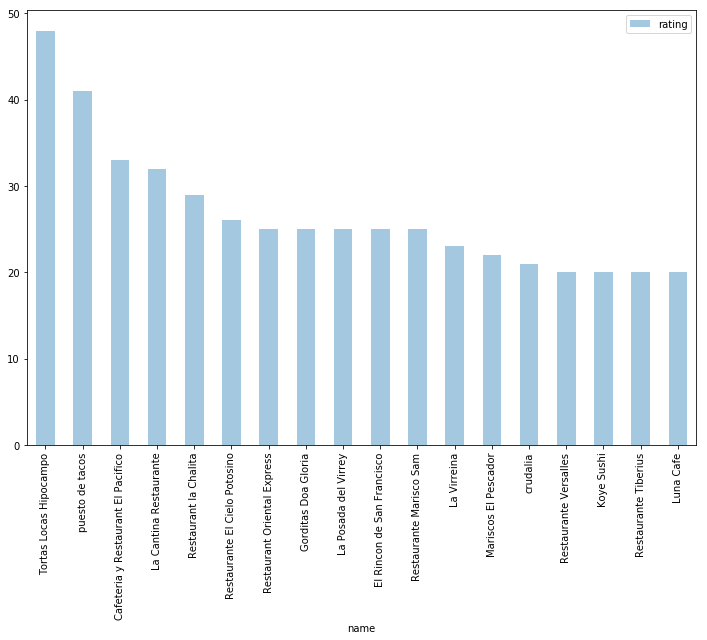

In [312]:
rating = file6[['placeID', 'rating']]
place_rating = rating.set_index('placeID').join(file5.set_index('placeID'), how='left')[['name', 'rating']]
place_rating = place_rating.groupby(['name']).sum().sort_values(by='rating',ascending = False)
place_rating[0:18].plot(kind='bar', alpha=0.40, figsize=(12,8), sort_columns = True)

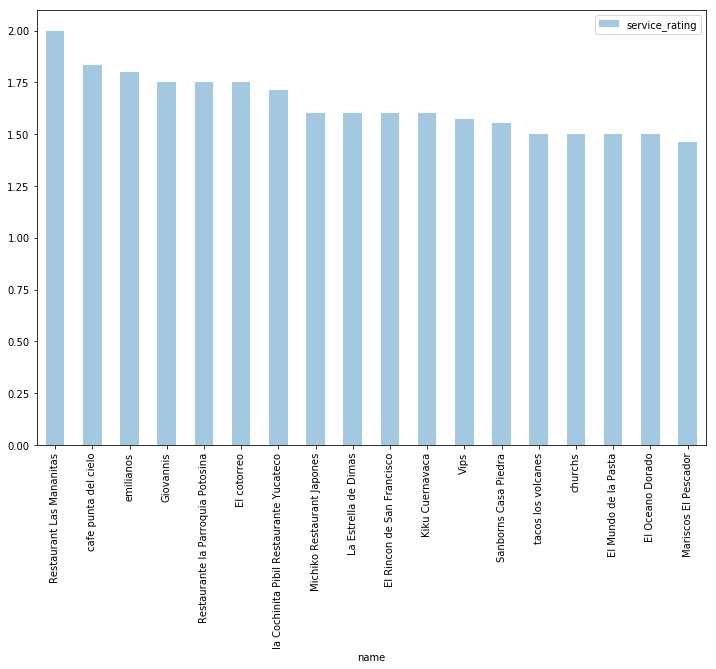

In [314]:
rating = file6[['placeID', 'service_rating']]
place_rating = rating.set_index('placeID').join(file5.set_index('placeID'), how='left')[['name', 'service_rating']]
place_rating = place_rating.groupby(['name']).sum().sort_values(by='service_rating',ascending = False)
place_rating[0:18].plot(kind='bar', alpha=0.40, figsize=(12,8), sort_columns = True)